In [379]:
import pandas as pd 
import numpy as np
import matplotlib as plt 
import seaborn as sns 
from sklearn.metrics import r2_score
import plotly.graph_objects as go
from prophet import Prophet
from prophet.plot import plot_plotly, plot_forecast_component_plotly
from sklearn.metrics import mean_squared_error, mean_absolute_error
import datetime
import nbformat

EDA paralelo de ambos datasets (en cada caso primero bike_test -df- y luego bike_train -dft-)

In [380]:
df = pd.read_csv('bike_test.csv')


In [381]:
dft = pd.read_csv('bike_train.csv')

Identificación de tipos de datos

In [382]:
df.dtypes

instant        int64
dteday        object
season         int64
yr             int64
mnth           int64
hr             int64
holiday        int64
weekday        int64
workingday     int64
weathersit     int64
temp          object
atemp         object
hum           object
windspeed     object
casual         int64
registered     int64
dtype: object

Tamaño del dataset

In [383]:
df.shape

(5380, 16)

In [384]:
dft.shape

(11999, 17)

Ver estadísticas del dataset

In [385]:
df.describe()

,instant,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,casual,registered
count,5380.000000,5380.000000,5380.0,5380.000000,5380.000000,5380.000000,5380.000000,5380.00000,5380.000000,5380.000000,5380.000000
mean,14689.500000,3.150558,1.0,8.784758,11.524721,0.031041,2.991078,0.67974,1.403532,48.224721,210.083457
std,1553.216555,0.839184,0.0,2.145166,6.920601,0.173444,2.007032,0.46662,0.612343,58.190764,186.387877
min,12000.000000,1.000000,1.0,5.000000,0.000000,0.000000,0.000000,0.00000,1.000000,0.000000,0.000000
25%,13344.750000,3.000000,1.0,7.000000,6.000000,0.000000,1.000000,0.00000,1.000000,6.000000,51.000000
50%,14689.500000,3.000000,1.0,9.000000,12.000000,0.000000,3.000000,1.00000,1.000000,28.000000,175.000000
75%,16034.250000,4.000000,1.0,11.000000,18.000000,0.000000,5.000000,1.00000,2.000000,69.000000,304.000000
max,17379.000000,4.000000,1.0,12.000000,23.000000,1.000000,6.000000,1.00000,3.000000,362.000000,886.000000


In [386]:
dft.describe()

,instant,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,casual,registered,cnt
count,11999.000000,11999.000000,11999.000000,11999.000000,11999.000000,11999.000000,11999.000000,11999.000000,11999.000000,11999.000000,11999.000000,11999.000000
mean,6000.000000,2.210684,0.279523,5.530294,11.556630,0.027752,3.009334,0.684057,1.435036,30.049837,128.545129,158.594966
std,3463.957275,1.088798,0.448784,3.433005,6.911891,0.164269,2.005264,0.464910,0.650894,43.596915,124.692750,151.392952
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,1.000000
25%,3000.500000,1.000000,0.000000,3.000000,6.000000,0.000000,1.000000,0.000000,1.000000,3.000000,29.000000,34.000000
50%,6000.000000,2.000000,0.000000,5.000000,12.000000,0.000000,3.000000,1.000000,1.000000,13.000000,98.000000,118.000000
75%,8999.500000,3.000000,1.000000,8.000000,18.000000,0.000000,5.000000,1.000000,2.000000,39.000000,185.000000,232.000000
max,11999.000000,4.000000,1.000000,12.000000,23.000000,1.000000,6.000000,1.000000,4.000000,367.000000,770.000000,957.000000


Analizar datos columna por columna

In [387]:
df['dteday'].value_counts() #fecha del registro

10/09/2012    24
18/10/2012    24
07/10/2012    24
08/10/2012    24
09/10/2012    24
              ..
08/11/2012    23
29/11/2012    23
20/05/2012    20
30/10/2012    11
29/10/2012     1
Name: dteday, Length: 226, dtype: int64

In [388]:
dft['dteday'].value_counts() #fecha del registro

01/01/2011    24
07/11/2011    24
06/12/2011    24
05/12/2011    24
04/12/2011    24
              ..
28/08/2011    17
26/01/2011    16
18/01/2011    12
27/01/2011     8
20/05/2012     4
Name: dteday, Length: 506, dtype: int64

In [389]:
df['season'].value_counts() #temporada (1: primavera, 2: verano, 3: otoño, 4: invierno)

3    2256
4    2098
2     764
1     262
Name: season, dtype: int64

In [390]:
dft['season'].value_counts() #temporada (1: primavera, 2: verano, 3: otoño, 4: invierno)

1    3980
2    3645
3    2240
4    2134
Name: season, dtype: int64

In [391]:
df['yr'].value_counts() #año del registro (0: 2011, 1:2012)

1    5380
Name: yr, dtype: int64

In [392]:
dft['yr'].value_counts() #año del registro (0: 2011, 1:2012)

0    8645
1    3354
Name: yr, dtype: int64

In [393]:
df['mnth'].value_counts() #mnth: mes del registro (1 a 12).

7     744
8     744
12    742
6     720
9     720
11    718
10    708
5     284
Name: mnth, dtype: int64

In [394]:
dft['mnth'].value_counts() #mnth: mes del registro (1 a 12).

3     1473
4     1437
1     1429
2     1341
5     1204
7      744
10     743
12     741
8      731
6      720
11     719
9      717
Name: mnth, dtype: int64

In [395]:
df['hr'].value_counts() #hora del registro (0 a 23).

16    225
15    225
23    225
22    225
21    225
20    225
19    225
18    225
17    225
14    225
13    225
5     224
12    224
11    224
10    224
9     224
8     224
7     224
6     224
0     224
2     223
4     223
1     223
3     220
Name: hr, dtype: int64

In [396]:
dft['hr'].value_counts() #hora del registro (0 a 23).

17    505
16    505
12    504
13    504
15    504
14    504
22    503
21    503
20    503
19    503
18    503
23    503
11    503
10    503
9     503
8     503
7     503
0     502
1     501
6     501
5     493
2     492
3     477
4     474
Name: hr, dtype: int64

In [397]:
df['holiday'].value_counts() #holiday: si el día meteorológico es feriado toma el valor 1, sino toma el valor 0

0    5213
1     167
Name: holiday, dtype: int64

In [398]:
dft['holiday'].value_counts() #holiday: si el día meteorológico es feriado toma el valor 1, sino toma el valor 0

0    11666
1      333
Name: holiday, dtype: int64

In [399]:
df['weekday'].value_counts() #día de la semana.


0    788
1    768
3    768
5    768
6    768
4    766
2    754
Name: weekday, dtype: int64

In [400]:
dft['weekday'].value_counts() #día de la semana.

6    1744
5    1719
0    1714
1    1711
3    1707
4    1705
2    1699
Name: weekday, dtype: int64

In [401]:
df['workingday'].value_counts() #si el día es laboral toma el valor 1, sino 0. 

1    3657
0    1723
Name: workingday, dtype: int64

In [402]:
dft['workingday'].value_counts() #si el día es laboral toma el valor 1, sino 0. 

1    8208
0    3791
Name: workingday, dtype: int64

In [403]:
df['weathersit'].value_counts() #indica el tipo de clima: 1: Despejado, 2: Neblina con nubes, neblina con nubes fragmentadas, neblina con algunas nubes o sólo neblina.
#3: Nieve ligera, llovizna con tormenta eléctrica y nubes dispersas o llovizna con nubes dispersas,
#4: Lluvia fuerte con granizos, tormenta eléctrica y neblina, o nieve con niebla.

1    3570
2    1449
3     361
Name: weathersit, dtype: int64

In [404]:
dft['weathersit'].value_counts() #indica el tipo de clima: 1: Despejado, 2: Neblina con nubes, neblina con nubes fragmentadas, neblina con algunas nubes o sólo neblina.
#3: Nieve ligera, llovizna con tormenta eléctrica y nubes dispersas o llovizna con nubes dispersas,
#4: Lluvia fuerte con granizos, tormenta eléctrica y neblina, o nieve con niebla.

1    7843
2    3095
3    1058
4       3
Name: weathersit, dtype: int64

In [405]:
df['temp'].value_counts() #temperatura normalizada en grados Celsius. La escala llega hasta un máximo de temperatura de 41ºC.

0,66    321
0,7     298
0,62    293
0,64    293
0,72    266
0,6     250
0,74    220
0,76    204
0,36    180
0,56    174
0,3     171
0,8     164
0,26    162
0,54    157
0,68    157
0,4     148
0,32    148
0,52    142
0,34    137
0,24    134
0,5     128
0,42    118
0,44    106
0,82    104
0,46    103
0,38    103
0,58    101
0,78     85
0,28     78
0,84     70
0,86     63
0,22     60
0,48     59
0,9      44
0,88     37
0,2      36
0,92     31
0,96     10
0,94      8
0,16      8
0,18      4
0,14      3
1         1
0,98      1
Name: temp, dtype: int64

In [406]:
dft['temp'].value_counts() #temperatura normalizada en grados Celsius. La escala llega hasta un máximo de temperatura de 41ºC.

0,34    508
0,36    491
0,3     470
0,4     466
0,32    463
0,46    456
0,62    433
0,42    430
0,6     425
0,52    414
0,54    412
0,56    405
0,5     403
0,44    401
0,64    399
0,26    397
0,7     392
0,24    388
0,66    372
0,22    361
0,2     318
0,72    304
0,74    296
0,38    269
0,48    229
0,28    223
0,16    222
0,58    204
0,76    192
0,68    192
0,8     161
0,18    151
0,14    135
0,82    109
0,78     84
0,12     76
0,86     68
0,84     68
0,1      51
0,9      46
0,92     18
0,08     17
0,02     17
0,04     16
0,88     16
0,06     16
0,94      9
0,96      6
Name: temp, dtype: int64

In [407]:
df['atemp'].value_counts() # sensación térmica normalizada en grados Celsius. 

0,6212    394
0,6667    274
0,6061    230
0,697     216
0,6515    201
0,5909    193
0,6364    190
0,5758    184
0,6818    181
0,5303    174
0,5455    167
0,5152    165
0,3333    152
0,4091    148
0,5       143
0,7121    131
0,4848    128
0,303     127
0,3485    124
0,2879    119
0,4242    118
0,2576    108
0,4394    106
0,4545    103
0,7273    103
0,3939    103
0,2424    100
0,7424     96
0,2273     88
0,2727     88
0,3182     83
0,7727     79
0,7576     74
0,5606     73
0,7879     68
0,4697     59
0,2121     51
0,3636     50
0,8182     36
0,803      36
0,3788     23
0,8333     20
0,197      16
0,8485     13
0,8636     10
0,8788      9
0,1818      9
0,8939      5
0,1667      5
0,9091      4
0,1515      2
0,9242      1
Name: atemp, dtype: int64

In [408]:
dft['atemp'].value_counts() # sensación térmica normalizada en grados Celsius.

0,6212    594
0,4091    466
0,4545    456
0,5152    453
0,3333    448
         ... 
0           2
0,9848      2
0,9091      1
0,9545      1
1           1
Name: atemp, Length: 65, dtype: int64

In [409]:
df['hum'].value_counts() # nivel de humedad normalizada.

0,83    271
0,88    195
0,66    172
0,7     166
0,73    145
       ... 
0,23      2
0,19      1
0,22      1
0,16      1
0,91      1
Name: hum, Length: 76, dtype: int64

In [410]:
dft['hum'].value_counts() # nivel de humedad normalizada.

0,94    474
0,88    462
0,87    365
0,83    359
0,93    274
       ... 
0,13      1
0,12      1
0,08      1
0,1       1
0,97      1
Name: hum, Length: 88, dtype: int64

In [411]:
df['windspeed'].value_counts() #velocidad del viento normalizada.

0         740
0,1642    586
0,1343    571
0,1045    566
0,194     531
0,0896    464
0,2239    457
0,2537    420
0,2836    285
0,2985    230
0,3284    131
0,3582    111
0,3881     76
0,4179     66
0,4478     44
0,4627     38
0,4925     24
0,5224     15
0,5821     11
0,6119      5
0,5522      4
0,6418      3
0,6567      2
Name: windspeed, dtype: int64

In [412]:
dft['windspeed'].value_counts() #velocidad del viento normalizada.

0         1440
0,1343    1167
0,194     1126
0,1642    1109
0,2239    1056
0,1045    1051
0,0896     961
0,2537     875
0,2836     763
0,2985     578
0,3284     471
0,3582     349
0,3881     305
0,4179     230
0,4478     132
0,4627     108
0,4925      88
0,5224      69
0,5522      35
0,5821      33
0,6119      18
0,6418      11
0,6567       9
0,6866       5
0,7463       2
0,806        2
0,8507       2
0,7164       2
0,7761       1
0,8358       1
Name: windspeed, dtype: int64

In [413]:
df['casual'].value_counts() #cantidad de usuarios casuales en el registro.

0      335
1      281
2      214
3      163
6      128
      ... 
231      1
289      1
242      1
263      1
224      1
Name: casual, Length: 291, dtype: int64

In [414]:
dft['casual'].value_counts() #cantidad de usuarios casuales en el registro.

0      1246
1       801
2       584
3       534
4       434
       ... 
320       1
355       1
326       1
321       1
203       1
Name: casual, Length: 287, dtype: int64

In [415]:
df['registered'].value_counts() #cantidad de usuarios registrados en el registro.

5      84
6      83
7      70
9      66
10     55
       ..
750     1
682     1
701     1
654     1
585     1
Name: registered, Length: 738, dtype: int64

In [416]:
dft['registered'].value_counts() #cantidad de usuarios registrados en el registro.

4      253
3      248
2      217
5      203
1      189
      ... 
511      1
563      1
322      1
647      1
570      1
Name: registered, Length: 623, dtype: int64

In [417]:
dft['cnt'].value_counts() #Cantidad total de bicicletas rentadas en el registro, incluyendo ambos tipos de usuarios (casuales y registrados).


4      192
3      191
5      189
2      188
6      177
      ... 
606      1
703      1
581      1
657      1
645      1
Name: cnt, Length: 713, dtype: int64

Busco nulos

In [418]:
df.apply(lambda x: sum(x.isnull()),axis=0)

instant       0
dteday        0
season        0
yr            0
mnth          0
hr            0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
dtype: int64

In [419]:
dft.apply(lambda x: sum(x.isnull()),axis=0)

instant       0
dteday        0
season        0
yr            0
mnth          0
hr            0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

<AxesSubplot:>

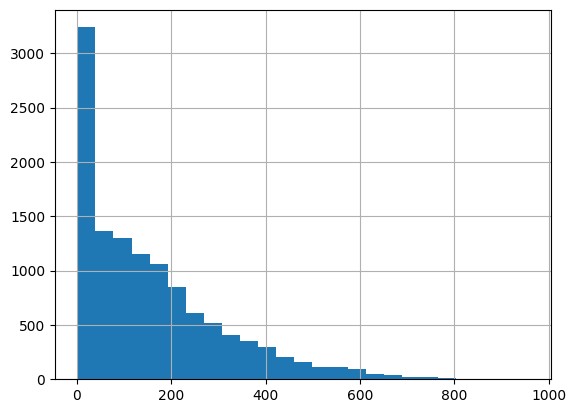

In [420]:
dft['cnt'].hist(bins=25)

AxesSubplot(0.125,0.11;0.775x0.77)


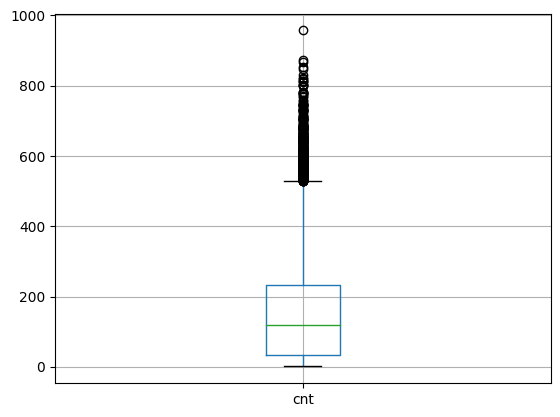

In [421]:
print(dft.boxplot(column='cnt'))

<AxesSubplot:xlabel='cnt'>

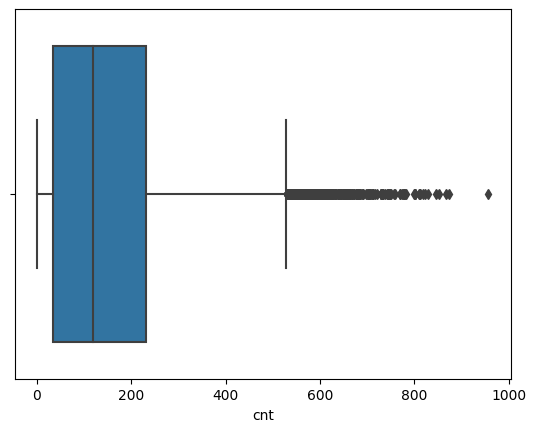

In [422]:
sns.boxplot(x=dft['cnt'])

Evaluo el alquiler de bicicletas teniendo en cuenta la fecha de alquiler

In [423]:
df['dteday'] = pd.to_datetime(df.dteday)

c:\Users\alimu\AppData\Local\Programs\Python\Python310\lib\site-packages\pandas\core\tools\datetimes.py:1047: UserWarning:

Parsing '20/05/2012' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.

c:\Users\alimu\AppData\Local\Programs\Python\Python310\lib\site-packages\pandas\core\tools\datetimes.py:1047: UserWarning:

Parsing '21/05/2012' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.

c:\Users\alimu\AppData\Local\Programs\Python\Python310\lib\site-packages\pandas\core\tools\datetimes.py:1047: UserWarning:

Parsing '22/05/2012' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.

c:\Users\alimu\AppData\Local\Programs\Python\Python310\lib\site-packages\pandas\core\tools\datetimes.py:1047: UserWarning:

Parsing '23/05/2012' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.

c:\Users\alimu\AppDa

In [424]:
ts2 = df.groupby('dteday').mean().reset_index()


In [425]:
ts2.dtypes

dteday        datetime64[ns]
instant              float64
season               float64
yr                   float64
mnth                 float64
hr                   float64
holiday              float64
weekday              float64
workingday           float64
weathersit           float64
casual               float64
registered           float64
dtype: object

In [426]:
dft['dteday'] = pd.to_datetime(dft.dteday)

c:\Users\alimu\AppData\Local\Programs\Python\Python310\lib\site-packages\pandas\core\tools\datetimes.py:1047: UserWarning:

Parsing '13/01/2011' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.

c:\Users\alimu\AppData\Local\Programs\Python\Python310\lib\site-packages\pandas\core\tools\datetimes.py:1047: UserWarning:

Parsing '14/01/2011' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.

c:\Users\alimu\AppData\Local\Programs\Python\Python310\lib\site-packages\pandas\core\tools\datetimes.py:1047: UserWarning:

Parsing '15/01/2011' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.

c:\Users\alimu\AppData\Local\Programs\Python\Python310\lib\site-packages\pandas\core\tools\datetimes.py:1047: UserWarning:

Parsing '16/01/2011' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.

c:\Users\alimu\AppDa

In [427]:
ts1 = dft.groupby('dteday').mean().reset_index()


In [428]:
ts1.dtypes

dteday        datetime64[ns]
instant              float64
season               float64
yr                   float64
mnth                 float64
hr                   float64
holiday              float64
weekday              float64
workingday           float64
weathersit           float64
casual               float64
registered           float64
cnt                  float64
dtype: object

In [429]:
df1 = ts1.filter(items=['dteday','cnt'])
df1

,dteday,cnt
0,2011-01-01,41.041667
1,2011-01-02,59.130435
2,2011-01-03,77.125000
3,2011-01-04,92.791667
4,2011-01-05,139.625000
...,...,...
501,2012-12-01,170.708333
502,2012-12-02,63.708333
503,2012-12-03,220.750000
504,2012-12-04,225.375000


In [430]:
df_test = ts2.filter(items=['dteday'])

Selecciono las variables x e y 

In [431]:
df_train=df1.rename(columns={'dteday':'ds','cnt':'y'})
df_train


,ds,y
0,2011-01-01,41.041667
1,2011-01-02,59.130435
2,2011-01-03,77.125000
3,2011-01-04,92.791667
4,2011-01-05,139.625000
...,...,...
501,2012-12-01,170.708333
502,2012-12-02,63.708333
503,2012-12-03,220.750000
504,2012-12-04,225.375000


In [432]:
df_test= df_test.rename(columns={'dteday':'ds','cnt':'y'})
df_test

,ds
0,2012-01-06
1,2012-01-07
2,2012-01-08
3,2012-01-09
4,2012-01-10
...,...
221,2012-12-27
222,2012-12-28
223,2012-12-29
224,2012-12-30


Entreno el modelo

In [433]:
from sklearn.model_selection import train_test_split as tts
df_train, df_test= tts(df, test_size=0.2, random_state=0)

In [434]:
df_test = ts2.filter(items=['dteday'])

In [435]:
df1 = ts1.filter(items=['dteday','cnt'])
df_train=df1.rename(columns={'dteday':'ds','cnt':'y'})

In [436]:
df_train.sort_values(by='ds')

,ds,y
0,2011-01-01,41.041667
1,2011-01-02,59.130435
2,2011-01-03,77.125000
3,2011-01-04,92.791667
4,2011-01-05,139.625000
...,...,...
501,2012-12-01,170.708333
502,2012-12-02,63.708333
503,2012-12-03,220.750000
504,2012-12-04,225.375000


In [437]:
df_train.dtypes

ds    datetime64[ns]
y            float64
dtype: object

In [438]:
df_test.dtypes

dteday    datetime64[ns]
dtype: object

Realizo las predicciones

In [439]:
regresion =Prophet(changepoint_prior_scale = 0.3,
                         n_changepoints = 200,
                         seasonality_mode = 'additive',
                         weekly_seasonality=True,
                         daily_seasonality = True,
                         yearly_seasonality = True, 
                         interval_width=0.95)
regresion.fit(df_train)

15:07:05 - cmdstanpy - INFO - Chain [1] start processing
15:07:06 - cmdstanpy - INFO - Chain [1] done processing


In [440]:
tuned_forecast = regresion.make_future_dataframe(periods=11, freq='Y')

In [441]:
forecast = regresion.predict(tuned_forecast)
plot_plotly(regresion,forecast)